In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

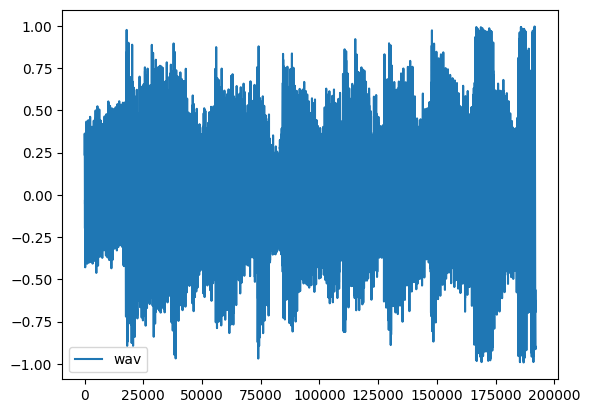

In [12]:
AUDIO_PATH = '/home/yytung/projects/test_audiobox/gao.wav'
wav, sr = sf.read(AUDIO_PATH)
wav = np.mean(wav, axis=1)
wav = wav[sr*15:sr*19]

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## ToneStack

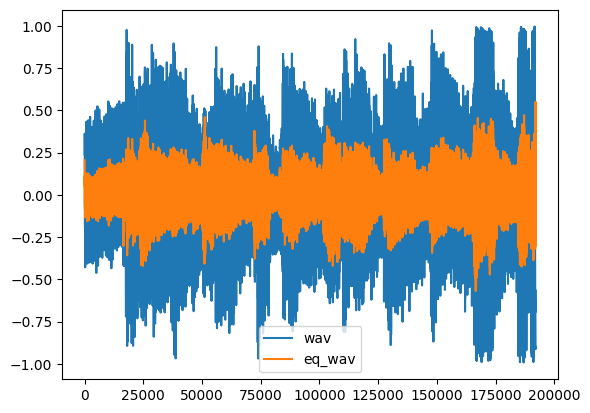

In [10]:
from diffFx_pytorch.processors.eq import Tonestack
TONE_DSP_PARAMS = {
    'bass': 0.0, 
    'mid': 0.0, 
    'treble': 1.0
}

Processor = Tonestack(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
eq_wav = Processor(test_wav, None, TONE_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=eq_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(eq_wav.squeeze().cpu().numpy(),      label='eq_wav')
plt.legend()

## Graphic EQ

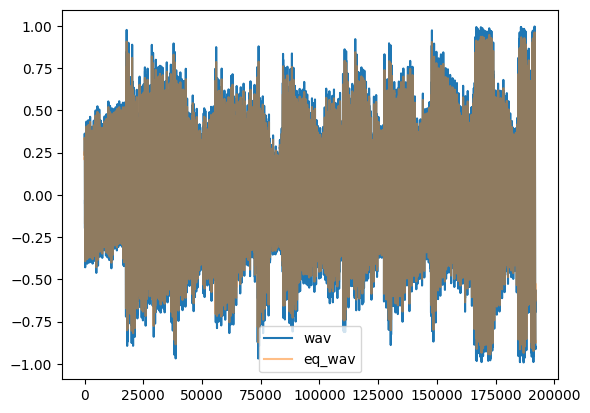

In [19]:
from diffFx_pytorch.processors.eq import GraphicEqualizer

Processor = GraphicEqualizer(sample_rate=sr, num_bands=30).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
TONE_DSP_PARAMS = {
    f'band_{i+1}_gain_db': -i//2 for i in range(Processor.num_bands)
}
eq_wav = Processor(test_wav, None, TONE_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=eq_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(eq_wav.squeeze().cpu().numpy(),      alpha=0.5,label='eq_wav')
plt.legend()

## Parametric EQ

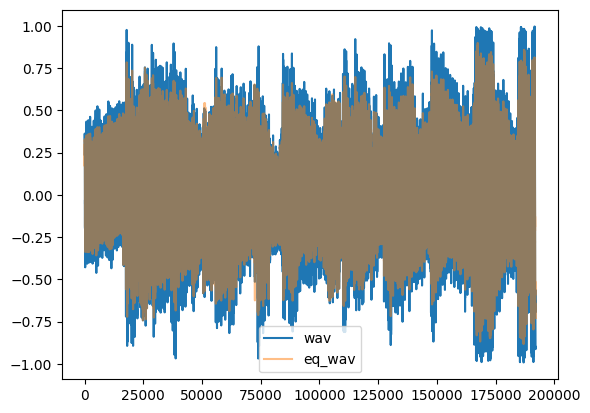

In [29]:
from diffFx_pytorch.processors.eq import ParametricEqualizer

TONE_DSP_PARAMS = {
    # Low shelf parameters
    'low_shelf_gain_db': -2.0,
    'low_shelf_frequency': 100.0,
    'low_shelf_q_factor': 0.707,
    f'peak_1_gain_db': -5.0,
    f'peak_1_frequency': 1000.0,
    f'peak_1_q_factor': 0.707,
    # High shelf parameters
    'high_shelf_gain_db': 4.0,
    'high_shelf_frequency': 10000.0,
    'high_shelf_q_factor': 0.707,
}

Processor = ParametricEqualizer(sample_rate=sr, num_peak_filters=1).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')

eq_wav = Processor(test_wav, None, TONE_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=eq_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(eq_wav.squeeze().cpu().numpy(),      alpha=0.5,label='eq_wav')
plt.legend()